# CNN: A Quick Look at Deep Learning

In this a quick overview of applying a convolutional neural net to solving the problem of mnist. We are using [Keras](https://keras.io/) which is a high-level neural networks API, written in Python. To [install Keras](https://keras.io/#installation) you can use the following conda commands. We install Tensorflow and then Keras:
```
pip install tensorflow
pip install keras
```
Depending on your system, the default backend of keras might be Theano. We will be using [Tensorflow backend](https://keras.io/backend/).

In [ ]:
# In order to search effectively for any library  just search anaconda cloud library name 

In [ ]:
# Most of the deep learning methods are sequential 
# This method is layered 

In [2]:
import numpy as np
import matplotlib.pylab as plt

# import keras and its sub-libraries useful for us
import keras
from keras import regularizers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

Keras allow us to load MNIST easily and preprocess it for learning.

In [3]:
# number of images used for calculating gradient
batch_size = 128

# number of loops over the whole training data 
epochs = 20

num_classes = 10 # mnist to be classified as 10 digits output

# input image dimensions
width = 28
height = 28

# keras automatically splits the data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the flattened images into 28 by 28 images and normalize the intensities
x_train = x_train.reshape(x_train.shape[0], height, width, 1)/255.0
x_test = x_test.reshape(x_test.shape[0], height, width, 1)/255.0

# convert class vectors to binary class matrices, more on this later
y_train_1hot = keras.utils.to_categorical(y_train, num_classes)
y_test_1hot = keras.utils.to_categorical(y_test, num_classes)

Let us visualize a few images from the data to make sure both the images and the labels are correct.

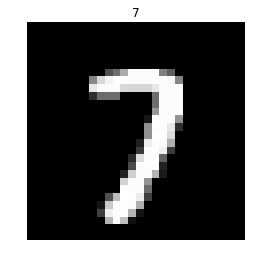

In [4]:
# choose a random image
k = np.random.choice(len(x_train))

# visualize the random chosen image
plt.imshow((x_train[k])[:,:,0] , cmap='gray')
# print the image label/class
plt.title(y_train[k])
plt.axis('off')
plt.show()

Here we create a convolutional neural network that will learn hand-written images on its own. Later in the course, we will learn about the details of how this model is created.

In [5]:
# specify the dimensions of our input
input_shape = (height, width, 1)

# type of the model
model = Sequential()

# first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))

# maxpooling and faltten for using dense layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

# dense layer with a l2 regularizer
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# output layer using softmax output
model.add(Dense(num_classes, activation='softmax'))

Next, we define our optimizer which is a simple gradient descent in this case with the learning rate of $0.001$.

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.005),
              metrics=['accuracy'])

Finally, we are ready to train our model on the data. You can see the performance of the model by following both the cost and percentage of correct answers (accuracy) in the training data. At the end of each epoch, we can see the performance of the model on the test set.

In [9]:
model.fit(x_train, y_train_1hot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test_1hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20


SystemError: <class 'range'> returned a result with an error set
Apply node that caused the error: Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)](TensorConstant{(1, 1, 1, 1) of 0.5}, InplaceDimShuffle{0,2,3,1}.0, Elemwise{Add}[(0, 0)].0)
Toposort index: 108
Inputs types: [TensorType(float32, (True, True, True, True)), TensorType(float32, 4D), TensorType(float32, 4D)]
Inputs shapes: [(1, 1, 1, 1), (128, 24, 24, 64), (128, 24, 24, 64)]
Inputs strides: [(4, 4, 4, 4), (147456, 96, 4, 2304), (147456, 96, 4, 2304)]
Inputs values: [array([[[[ 0.5]]]], dtype=float32), 'not shown', 'not shown']
Outputs clients: [[Sum{axis=[0, 1, 2], acc_dtype=float64}(Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)].0), InplaceDimShuffle{0,3,1,2}(Elemwise{Composite{((i0 * i1) + (i0 * i1 * sgn(i2)))}}[(0, 1)].0)]]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

Our model performs very well on MNIST. This model can be tuned to even higher accuracies but at this state, the more important thing is to understand how it works.

Based on numbers, we can see that our model is capable of recongizing the digits from around 97% of the images. It would feel good to see our model in action so let us show the model a few images and ask for the corresponding digit.

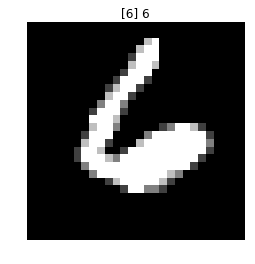

In [18]:
k = np.random.choice(len(x_test))

plt.imshow(x_test[k][:,:,0] , cmap='gray')

image = x_test[k].reshape(1,28,28,1)# picking 1 random image , 28 by 28 , 1 matrix, If it was RGB it would have been (1,28,28,3)

# our model guess for the label of the image
label = model.predict_classes(image,verbose=False)

plt.title(str(label)+' '+str(y_test[k]))
plt.axis('off')
plt.show()